In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [3]:
x_train = np.array(
    [25, 600, 70, 150, 300, 110, 225]
)  # Salaries of people in thousand PKR
y_train = np.array(
    [1, 0, 1, 1, 0, 1, 0]
)  # Whether they can be considered for a financial aid program or not


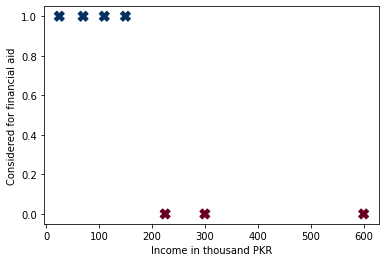

In [4]:
plt.xlabel("Income in thousand PKR")
plt.ylabel("Considered for financial aid")
plt.scatter(
    x_train, y_train, c=y_train, cmap="RdBu", marker="X", label="Training Data", s=100
)
plt.show()


In [5]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        cost += -y[i] * np.log(sigmoid(w * x[i] + b)) - (1 - y[i]) * (
            np.log(1 - sigmoid(w * x[i] + b))
        )
    cost = cost / m
    return cost


In [6]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        dj_dw += (sigmoid(w * x[i] + b) - y[i]) * x[i]
        dj_db += sigmoid(w * x[i] + b) - y[i]
    dj_dw /= m
    dj_db /= m
    return (dj_dw, dj_db)


In [20]:
def gradient_descent(x, y, w, b, lr):
    dj_dw, dj_db = compute_gradient(x, y, w, b)
    i = 0
    while True:
        prev_cost = compute_cost(x, y, w, b)
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - lr * dj_dw
        b = b - lr * dj_db
        new_cost = compute_cost(x, y, w, b)
        d_cost = prev_cost - new_cost
        i += 1
        if i % 1000 == 0:
            print(f"Cost After epoch-{i}: {new_cost}")
        if d_cost < 0.0000001:
            break
    return (w, b)


In [21]:
w = 0  # weight
b = 0  # bias


In [22]:
new_w, new_b = gradient_descent(x_train, y_train, w, b, 0.0001)
print(f"w:{new_w}, b:{new_b}")


Cost After epoch-1000: 0.6010970424677967
Cost After epoch-2000: 0.5958127212292252
Cost After epoch-3000: 0.5906205316933967
Cost After epoch-4000: 0.5855186568968642
Cost After epoch-5000: 0.5805053038383406
Cost After epoch-6000: 0.5755787041489188
Cost After epoch-7000: 0.5707371146867412
Cost After epoch-8000: 0.565978818059283
Cost After epoch-9000: 0.5613021230764375
Cost After epoch-10000: 0.5567053651376072
Cost After epoch-11000: 0.5521869065560037
Cost After epoch-12000: 0.5477451368233316
Cost After epoch-13000: 0.5433784728180094
Cost After epoch-14000: 0.5390853589600318
Cost After epoch-15000: 0.5348642673155252
Cost After epoch-16000: 0.5307136976539873
Cost After epoch-17000: 0.5266321774611293
Cost After epoch-18000: 0.522618261910165
Cost After epoch-19000: 0.5186705337943067
Cost After epoch-20000: 0.5147876034231401
Cost After epoch-21000: 0.5109681084854667
Cost After epoch-22000: 0.5072107138810982
Cost After epoch-23000: 0.5035141115240004
Cost After epoch-24000

In [43]:
x_test = np.array([75, 5, 350, 253, 105, 95, 904, 14, 45])
y_test = np.array([1, 1, 0, 0, 1, 1, 0, 1, 1])
m = x_test.shape[0]
prediction_set = np.zeros(m, dtype=int)
for i in range(m):
    if sigmoid(new_w * x_test[i] + new_b) >= 0.5:
        prediction_set[i] = 1
    else:
        prediction_set[i] = 0
print(prediction_set)
print(y_test)


[1 1 0 0 1 1 0 1 1]
[1 1 0 0 1 1 0 1 1]
